# Búsquedas en la base de datos de ChEMBL

In [35]:
import pandas as pd
import numpy as np
import sqlite3
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

In [3]:
con = sqlite3.connect('ChEMBL_sqlite/chembl_27.db')

In [12]:
querry = "SELECT compound_structures.molregno, compound_structures.canonical_smiles,activities.standard_value, activities.standard_units FROM target_dictionary INNER JOIN assays ON target_dictionary.tid = assays.tid INNER JOIN activities ON assays.assay_id = activities.assay_id INNER JOIN molecule_dictionary ON activities.molregno = molecule_dictionary.molregno INNER JOIN compound_structures ON molecule_dictionary.molregno = compound_structures.molregno WHERE target_dictionary.tid = 10452 AND standard_type = 'IC50' AND standard_units = 'nM'" 

In [14]:
df = pd.read_sql_query(querry,con)

In [15]:
df.head()

,molregno,canonical_smiles,standard_value,standard_units
0,147999,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,nM
1,147540,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,nM
2,147085,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,nM
3,147770,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,nM
4,147416,CCC(N/N=C(/N)S)c1cccc(Br)c1,10000.0,nM


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   molregno          722 non-null    int64  
 1   canonical_smiles  722 non-null    object 
 2   standard_value    722 non-null    float64
 3   standard_units    722 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.7+ KB


Exiten 722 compuestos inhibidores de Cruzipaina en esta base de datos

In [22]:
df.duplicated(subset='molregno', keep='first').sum()

175

Existen 175 compuestos duplicados en la base de datos

In [24]:
df.drop_duplicates(subset=['molregno'], inplace=True)

In [26]:
print('Total de inhibidores de Cruzipaina:', len(df))

Total de inhibidores de Cruzipaina: 547


In [30]:
df.isnull().sum()

molregno            0
canonical_smiles    0
standard_value      0
standard_units      0
dtype: int64

In [17]:
querry2 = "SELECT compound_structures.molregno, compound_structures.canonical_smiles,activities.standard_value, activities.standard_units FROM target_dictionary INNER JOIN assays ON target_dictionary.tid = assays.tid INNER JOIN activities ON assays.assay_id = activities.assay_id INNER JOIN molecule_dictionary ON activities.molregno = molecule_dictionary.molregno INNER JOIN compound_structures ON molecule_dictionary.molregno = compound_structures.molregno WHERE target_dictionary.tid = 10495 AND standard_type = 'IC50' AND standard_units = 'nM'" 

In [18]:
catk = pd.read_sql_query(querry2,con)

In [19]:
catk.head()

,molregno,canonical_smiles,standard_value,standard_units
0,189716,C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H]1C(=O)N2CC...,2500.0,nM
1,189647,CC(C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H]1C(=O)...,100.0,nM
2,189682,O=C(N[C@@H](Cc1ccccc1)C(=O)N[C@@H]1C(=O)N2CCO[...,1630.0,nM
3,189578,O=C(N[C@@H](Cc1ccccc1)C(=O)N[C@@H]1C(=O)N2CCO[...,5.0,nM
4,122224,COc1ccc(NCCNC(=O)[C@H](CC(C)C)NC(=O)c2ccc(OCc3...,3.0,nM


In [20]:
catk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   molregno          1713 non-null   int64  
 1   canonical_smiles  1713 non-null   object 
 2   standard_value    1713 non-null   float64
 3   standard_units    1713 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.7+ KB


Existen 1713 compuestos inhibidores de Catepsina K en esta base de datos

In [27]:
catk.duplicated(subset='molregno', keep='first').sum()

206

Existen 206 compuestos duplicados 

In [28]:
catk.drop_duplicates(subset=['molregno'], inplace=True)

In [29]:
print('Total de inhibidores de Catepsina K:', len(catk))

Total de inhibidores de Catepsina K: 1507


In [31]:
catk.isnull().sum()

molregno            0
canonical_smiles    0
standard_value      0
standard_units      0
dtype: int64

Veamos ahora los compuestos que tienen en común Cruzipaina y Catepsina K:

In [60]:
compartidos = pd.merge(df, catk, how='inner', on='molregno')

In [61]:
compartidos

,molregno,canonical_smiles_x,standard_value_x,standard_units_x,canonical_smiles_y,standard_value_y,standard_units_y
0,577347,CC(C)Nc1nc(C#N)nc(Nc2ccccc2)n1,890.0,nM,CC(C)Nc1nc(C#N)nc(Nc2ccccc2)n1,200.000,nM
1,577411,N#Cc1nc(Nc2cccc(Cl)c2)nc(NC2CCCC2)n1,79.0,nM,N#Cc1nc(Nc2cccc(Cl)c2)nc(NC2CCCC2)n1,17.380,nM
2,577361,N#Cc1nc(Nc2cc(F)cc(F)c2)nc(NC2CCCC2)n1,63.0,nM,N#Cc1nc(Nc2cc(F)cc(F)c2)nc(NC2CCCC2)n1,20.420,nM
3,577380,CCn1cnc2c(Nc3cc(F)cc(F)c3)nc(C#N)nc21,10.0,nM,CCn1cnc2c(Nc3cc(F)cc(F)c3)nc(C#N)nc21,23.440,nM
4,577314,CCNc1nc(C#N)nc2c1ncn2-c1cc(F)cc(F)c1,251.0,nM,CCNc1nc(C#N)nc2c1ncn2-c1cc(F)cc(F)c1,50.120,nM
5,326812,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(N3CCNCC3)cc2)...,1.8,nM,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(N3CCNCC3)cc2)...,0.005,nM
6,414254,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc...,0.2,nM,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc...,0.600,nM
7,714927,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2...,0.2,nM,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2...,0.900,nM
8,714928,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)CC3)...,0.2,nM,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)CC3)...,3.000,nM
9,714929,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc([C@@H](O)C(F)F...,0.4,nM,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc([C@@H](O)C(F)F...,2.000,nM


Existen 11 compuestos en común entre Cruzipaina y Catepsina K. A continuación se muestran sus estructuras químicas.

In [42]:
compuestos = compartidos[['canonical_smiles_x']]

In [43]:
PandasTools.AddMoleculeColumnToFrame(compuestos, 'canonical_smiles_x', 'Structure')

/home/seba/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/rdkit/Chem/PandasTools.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,canonical_smiles_x,Structure
0,CC(C)Nc1nc(C#N)nc(Nc2ccccc2)n1,
1,N#Cc1nc(Nc2cccc(Cl)c2)nc(NC2CCCC2)n1,
2,N#Cc1nc(Nc2cc(F)cc(F)c2)nc(NC2CCCC2)n1,
3,CCn1cnc2c(Nc3cc(F)cc(F)c3)nc(C#N)nc21,
4,CCNc1nc(C#N)nc2c1ncn2-c1cc(F)cc(F)c1,
5,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(N3CCNCC3)cc2)...,
6,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc...,
7,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2...,
8,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)CC3)...,
9,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc([C@@H](O)C(F)F...,

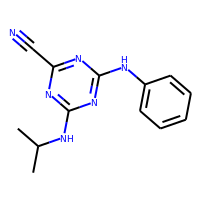
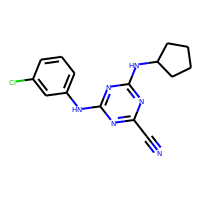
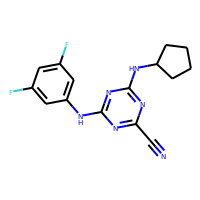
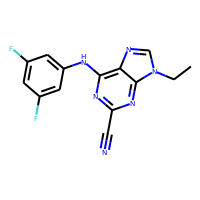
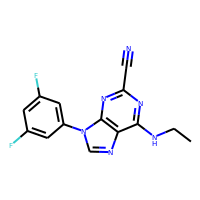
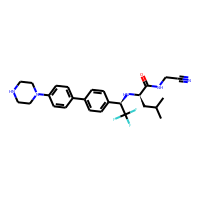
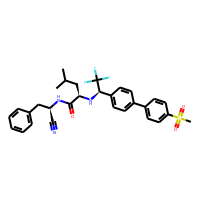
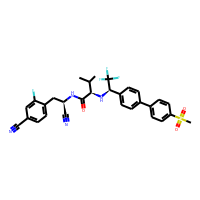
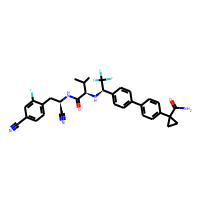
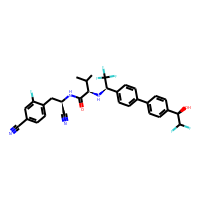
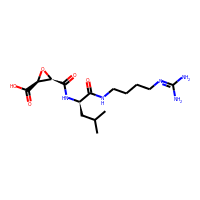

In [41]:
compuestos

In [57]:
def pIC50(input):
    pIC50_cz = []

    for i in input['standard_value_x']:
        molar = i*(10**-9) # Converts nM to M
        pIC50_cz.append(-np.log10(molar))

    input['pIC50 CZ'] = pIC50_cz
    x = input
        
    return x

In [62]:
compartidos2 = pIC50(compartidos)

In [63]:
compartidos2

,molregno,canonical_smiles_x,standard_value_x,standard_units_x,canonical_smiles_y,standard_value_y,standard_units_y,pIC50 CZ
0,577347,CC(C)Nc1nc(C#N)nc(Nc2ccccc2)n1,890.0,nM,CC(C)Nc1nc(C#N)nc(Nc2ccccc2)n1,200.000,nM,6.050610
1,577411,N#Cc1nc(Nc2cccc(Cl)c2)nc(NC2CCCC2)n1,79.0,nM,N#Cc1nc(Nc2cccc(Cl)c2)nc(NC2CCCC2)n1,17.380,nM,7.102373
2,577361,N#Cc1nc(Nc2cc(F)cc(F)c2)nc(NC2CCCC2)n1,63.0,nM,N#Cc1nc(Nc2cc(F)cc(F)c2)nc(NC2CCCC2)n1,20.420,nM,7.200659
3,577380,CCn1cnc2c(Nc3cc(F)cc(F)c3)nc(C#N)nc21,10.0,nM,CCn1cnc2c(Nc3cc(F)cc(F)c3)nc(C#N)nc21,23.440,nM,8.000000
4,577314,CCNc1nc(C#N)nc2c1ncn2-c1cc(F)cc(F)c1,251.0,nM,CCNc1nc(C#N)nc2c1ncn2-c1cc(F)cc(F)c1,50.120,nM,6.600326
5,326812,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(N3CCNCC3)cc2)...,1.8,nM,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(N3CCNCC3)cc2)...,0.005,nM,8.744727
6,414254,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc...,0.2,nM,CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc...,0.600,nM,9.698970
7,714927,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2...,0.2,nM,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2...,0.900,nM,9.698970
8,714928,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)CC3)...,0.2,nM,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc(C3(C(N)=O)CC3)...,3.000,nM,9.698970
9,714929,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc([C@@H](O)C(F)F...,0.4,nM,CC(C)[C@H](N[C@@H](c1ccc(-c2ccc([C@@H](O)C(F)F...,2.000,nM,9.397940
